In [50]:
import pandas
import numpy as np
from sklearn.externals.six import StringIO
from sklearn import tree
import pydot
from sklearn.datasets import load_iris
from IPython.display import Image
import copy

data = pandas.read_csv('_ea07570741a3ec966e284208f588e50e_titanic.csv', index_col='PassengerId')
data[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
8,0,3,"Palsson, Master. Gosta Leonard",male,2,3,1,349909,21.0750,NaN,S
9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27,0,2,347742,11.1333,NaN,S


In [51]:
data.dropna(axis=0, how='any', thresh=None, subset=None, inplace=True)
data[:10]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
7,0,1,"McCarthy, Mr. Timothy J",male,54,0,0,17463,51.8625,E46,S
11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4,1,1,PP 9549,16.7000,G6,S
12,1,1,"Bonnell, Miss. Elizabeth",female,58,0,0,113783,26.5500,C103,S
22,1,2,"Beesley, Mr. Lawrence",male,34,0,0,248698,13.0000,D56,S
24,1,1,"Sloper, Mr. William Thompson",male,28,0,0,113788,35.5000,A6,S
28,0,1,"Fortune, Mr. Charles Alexander",male,19,3,2,19950,263.0000,C23 C25 C27,S
53,1,1,"Harper, Mrs. Henry Sleeper (Myna Haxtun)",female,49,1,0,PC 17572,76.7292,D33,C


In [52]:
data1 = copy.deepcopy(data[['Pclass', 'Fare', 'Age', 'Sex']])
def encode(x):
    if x=='male':
        return 1
    if x=='female':
        return 0
data1['Sex'] = data1['Sex'].apply(encode)
data2 = copy.deepcopy(data[['Survived']])
data1[:10]

,Pclass,Fare,Age,Sex
PassengerId,,,,
2,1,71.2833,38,0
4,1,53.1000,35,0
7,1,51.8625,54,1
11,3,16.7000,4,0
12,1,26.5500,58,0
22,2,13.0000,34,1
24,1,35.5000,28,1
28,1,263.0000,19,1
53,1,76.7292,49,0


In [53]:
data2[0:10]

,Survived
PassengerId,
2,1
4,1
7,0
11,1
12,1
22,1
24,1
28,0
53,1


In [54]:
clf = tree.DecisionTreeClassifier(random_state=241)
clf = clf.fit(data1, data2)
clf

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            presort=False, random_state=241, splitter='best')

In [55]:
importances = clf.feature_importances_
importances

array([ 0.01793336,  0.29549222,  0.40310552,  0.2834689 ])

In [56]:
indices = np.argsort(importances)[::-1]
indices
# Print the feature ranking
print("Feature ranking:")

for f in xrange(data1.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

Feature ranking:
1. feature 2 (0.403106)
2. feature 1 (0.295492)
3. feature 3 (0.283469)
4. feature 0 (0.017933)


In [57]:
features = data1.columns.values
features

array(['Pclass', 'Fare', 'Age', 'Sex'], dtype=object)

In [58]:
q = list(xrange(data1.shape[1]))
q

[0, 1, 2, 3]

In [59]:
ind = [indices[f] for f in q]
ind

[2, 1, 3, 0]

In [60]:
dict(zip(ind,features))

{0: 'Sex', 1: 'Fare', 2: 'Pclass', 3: 'Age'}

In [61]:
list(dict(zip(ind,features)).values())[:2]

['Sex', 'Fare']

In [62]:
def extract_top_features(features, indices, n):
    q = list(xrange(len(features)))
    ind = [indices[f] for f in q]
    ranks = dict(zip(ind,features))
    return list(ranks.values()[:2])

n = 2

ans = extract_top_features(features, indices, n)

In [63]:
dictionary = dict(zip(importances, data1.columns.values))
dictionary

{0.017933362369337985: 'Pclass',
 0.28346889952153104: 'Sex',
 0.29549222165179184: 'Fare',
 0.40310551645733922: 'Age'}

In [64]:
with open("answer.txt", 'w') as a:
    a.write(' '.join(ans))

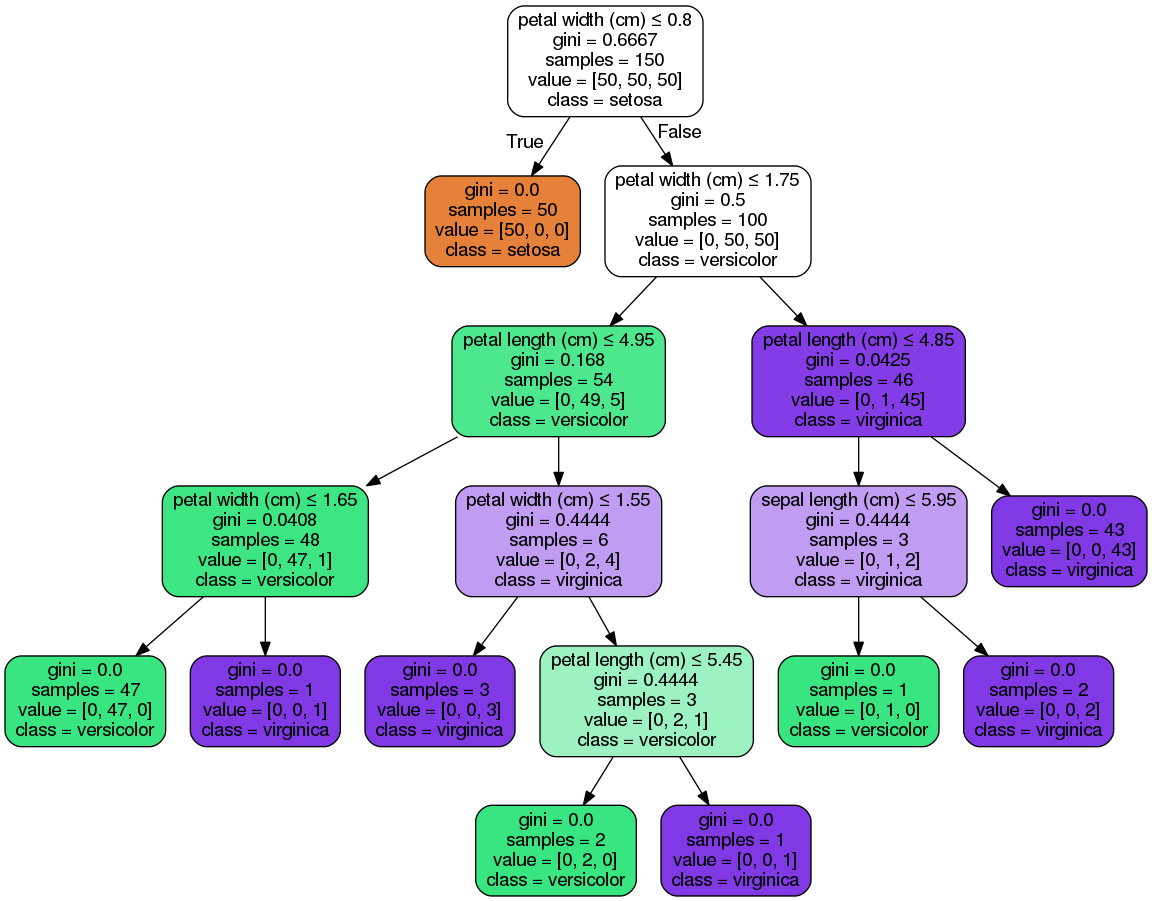

In [65]:
from sklearn.datasets import load_iris
iris = load_iris()
clf1 = tree.DecisionTreeClassifier()
clf1 = clf1.fit(iris.data, iris.target)

from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf1, out_file=dot_data,  
                         feature_names=iris.feature_names,  
                         class_names=iris.target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  

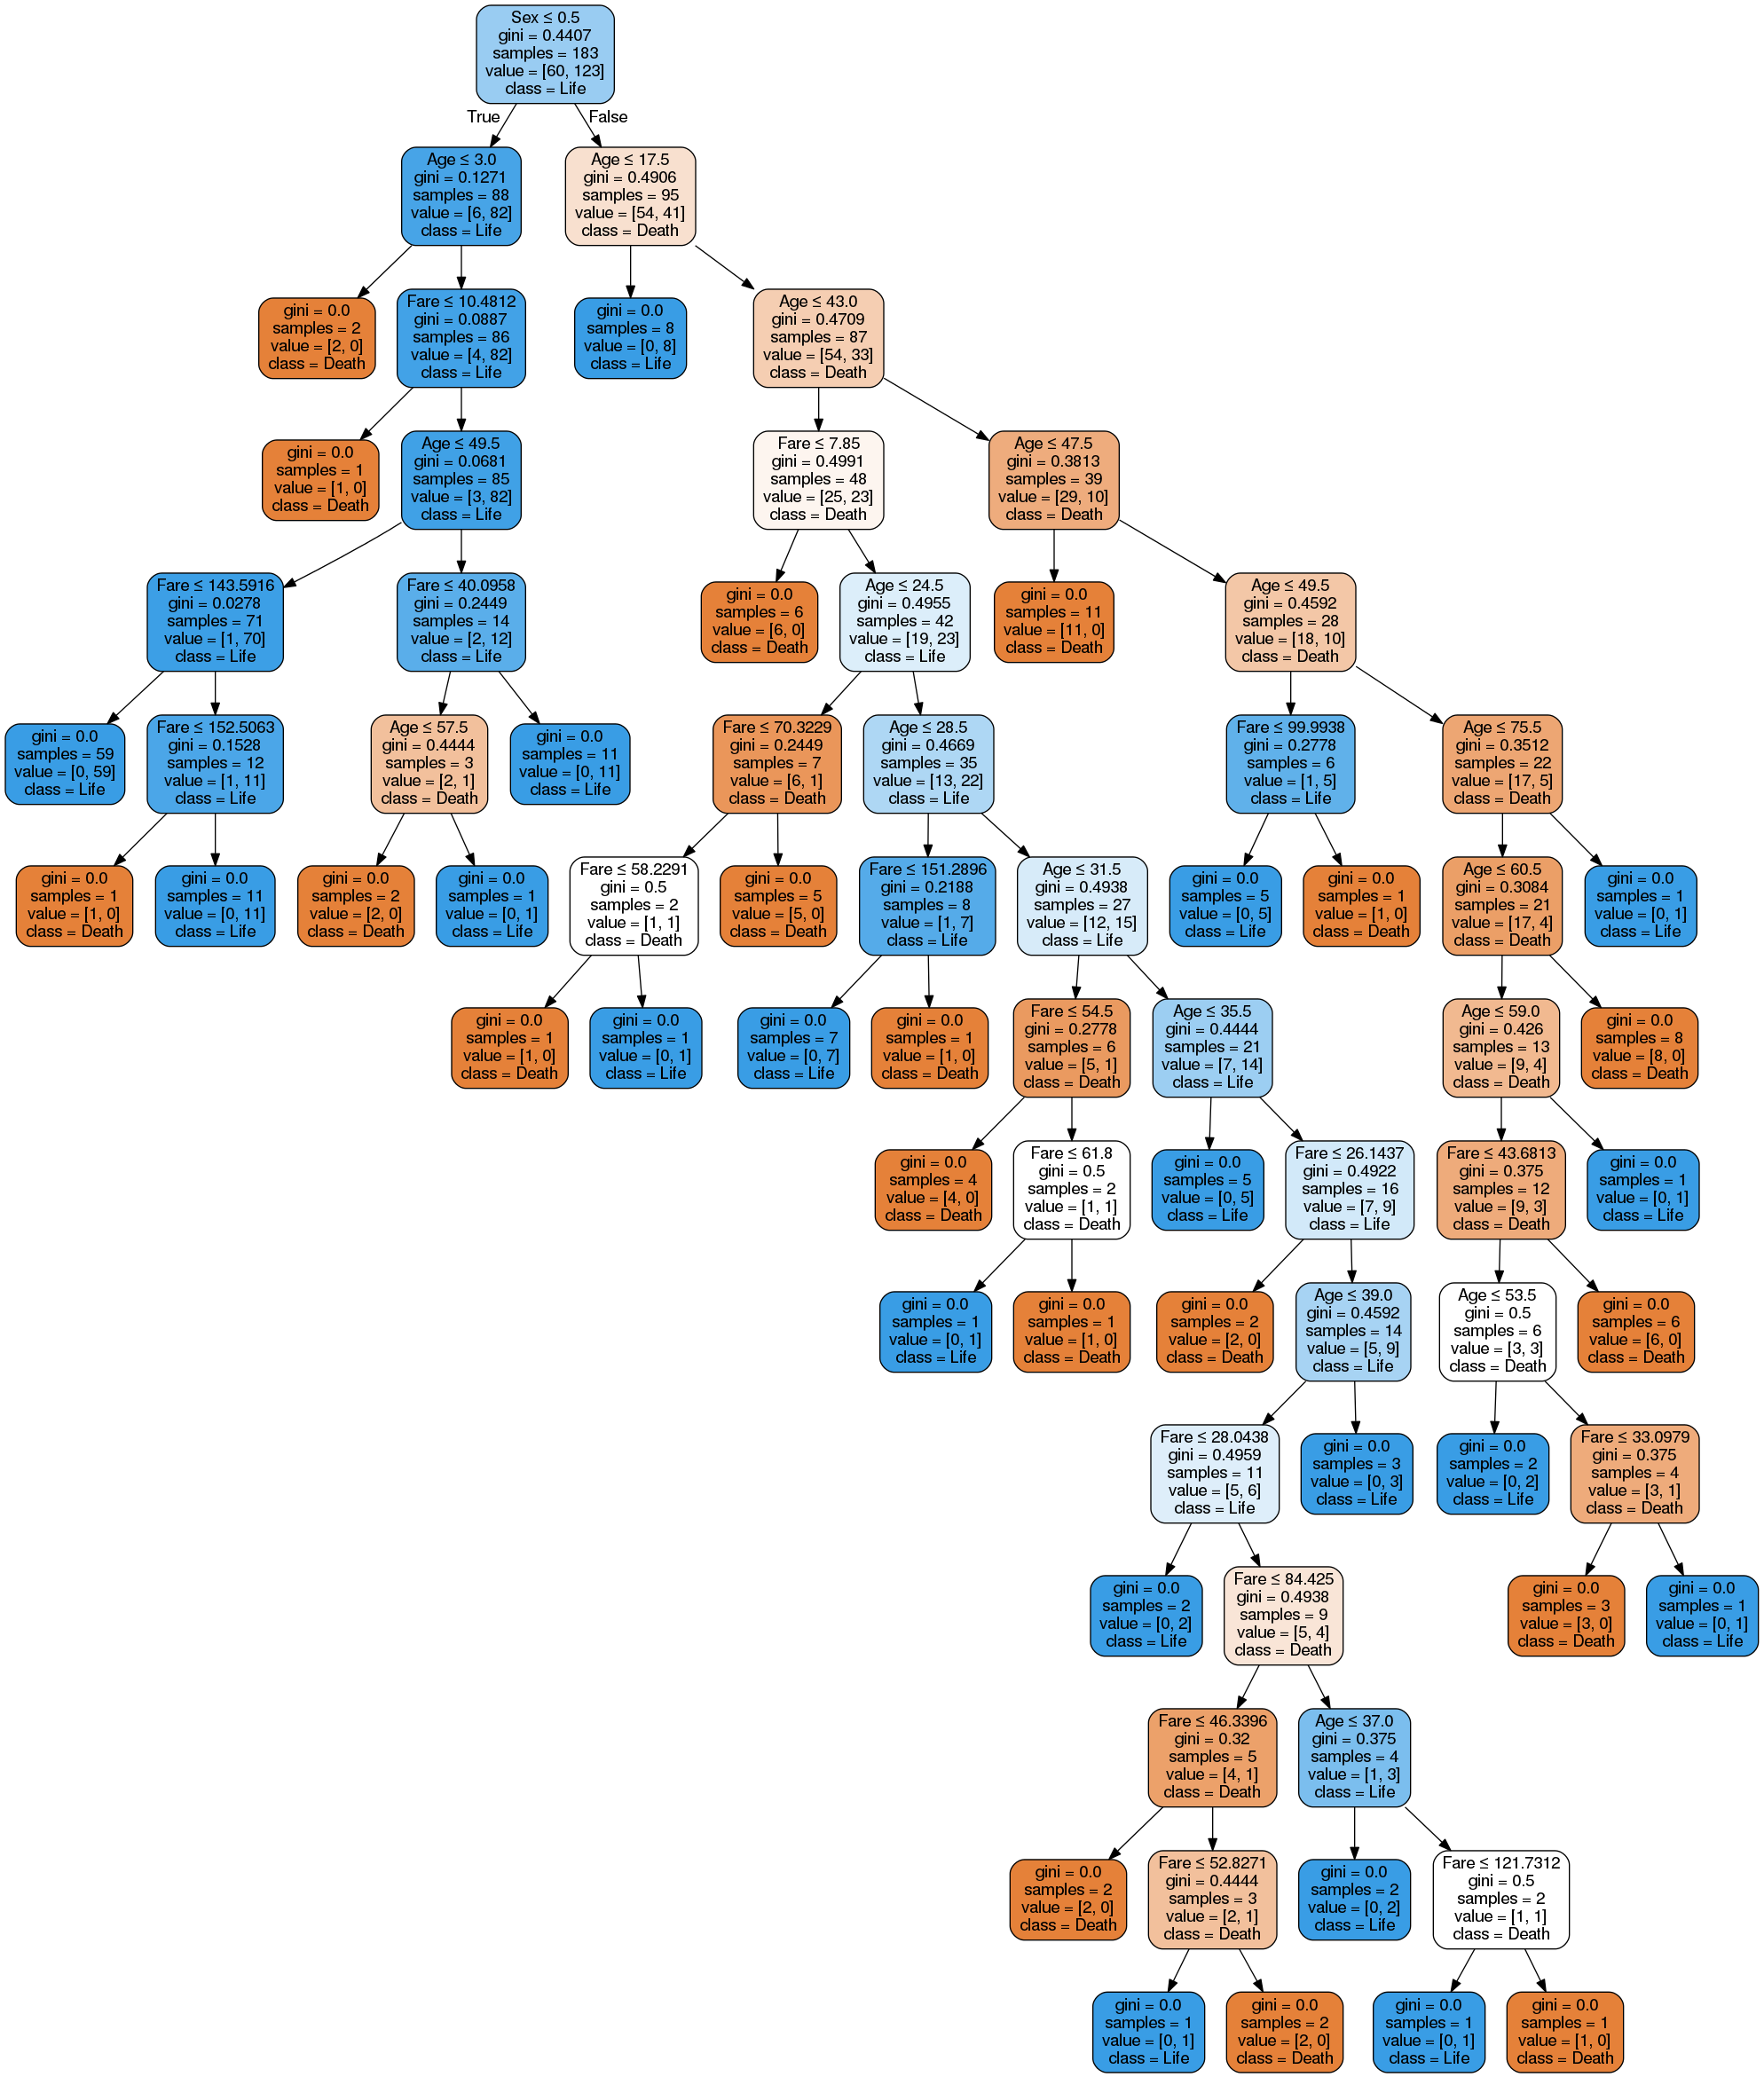

In [83]:
from IPython.display import Image  
dot_data = StringIO()  
tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=data1.columns.values,  
                         class_names=['Death', 'Life'],  
                         filled=True, rounded=True,  
                         special_characters=True)  
graph = pydot.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())  